# Predicting CAI from UTR genome data using deep learning

---

![](http://hawaiireedlab.com/gwiki/images/thumb/6/62/Gene-protein-coding.png/800px-Gene-protein-coding.png)

---






# GOOGLE DRIVE MOUNT

In [2]:
# If we want to use the save/load models later, we will have to mount the google drive first.
# We have put the models saved file in the shared directory for case you will need to load them

from google.colab import drive
drive.mount('/GoogleDrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /GoogleDrive


# Models

## Baseline

### Data Preprocess - Baseline

In [19]:
import numpy as np_bl

path = '/GoogleDrive/My Drive/project_0330342797_038628343/data/OurData/'
pathOutput = '/GoogleDrive/My Drive/project_0330342797_038628343/baseline/'
file='data_random_forest_1500_records_from037_to087_for_each_hundretch_of_each_bacteria_75000_Records.npy'
file2 ='data_random_forest_betaFamily_263379.npy'
file3 ='data_random_forest_all_up_to_13_from037_to087_for_each_hundretch_of_each_bacteria_257648_Records.npy'
file1 = 'data_random_forest_all_up_to_13_for_each_hundretch_of_each_bacteria_270274_Records.npy'
dataBL = np_bl.load(path+file)

print(dataBL.shape)

(75000, 51)


In [20]:
# split data to train, test --> with shuffling

from sklearn.model_selection import train_test_split

dataBL_train, dataBL_test = train_test_split(dataBL,train_size=0.7,test_size=0.3,random_state=42)

# all data
dataBL_all_data = dataBL[:,0:50]
dataBL_all_target = dataBL[:,50]
dataBL_all_target1 = dataBL[:,50]*1000
dataBL_all_target1 = dataBL_all_target1.astype(np_bl.int64)
print('dataBL_all_data.shape',dataBL_all_data.shape)
print('dataBL_all_target.shape',dataBL_all_target.shape)
print('dataBL_all_target1',dataBL_all_target1[1:10])

# train data + target
dataBL_train_data = dataBL_train[:,0:50]
dataBL_train_target = dataBL_train[:,50]
print('dataBL_train_data.shape',dataBL_train_data.shape)
#print('dataBL_train_data',dataBL_train_data[1:10])

dataBL_train_target1 = dataBL_train[:,50]*1000
dataBL_train_target1 = dataBL_train_target1.astype(np_bl.int64)
print('dataBL_train_target1',dataBL_train_target1[1:10])

# test data + target
dataBL_test_data = dataBL_test[:,0:50]
dataBL_test_target = dataBL_test[:,50]
print('dataBL_test_data.shape',dataBL_test_data.shape)
#print('dataBL_test_data',dataBL_test_data[1:10])

dataBL_test_target1 = dataBL_test[:,50]*1000
dataBL_test_target1 = dataBL_test_target1.astype(np_bl.int64)
print('dataBL_test_target1',dataBL_test_target1[1:10])

dataBL_all_data.shape (75000, 50)
dataBL_all_target.shape (75000,)
dataBL_all_target1 [383 383 384 378 382 379 380 380 379]
dataBL_train_data.shape (52500, 50)
dataBL_train_target1 [833 734 399 637 405 431 832 657 582]
dataBL_test_data.shape (22500, 50)
dataBL_test_target1 [392 503 861 775 853 552 377 591 669]


### Determine Performance Metrics 

In [26]:
# Calc some baseline metrics
print('Baseline Min Range:', round(np_bl.min(dataBL_train_target1), 2))
print('Baseline Max Range:', round(np_bl.max(dataBL_train_target1), 2))

# Our basic baseline will be the mean of the train dataset
predictions_bl = np_bl.mean(dataBL_train_target1)
print('Baseline Mean/Prediction:', round(np_bl.mean(dataBL_train_target1), 2))

# Calculate the absolute errors
errors_bl = abs(predictions_bl - dataBL_test_target1)
errors_sqrd_bl = errors_bl*errors_bl
mae_bl=round(np_bl.mean(errors_bl), 2)
mse_bl=round(np_bl.mean(errors_sqrd_bl), 2)
rmse_bl=round(np_bl.sqrt(mse_bl), 2)


# Print out the mean absolute error (mae)
print('Baseline Mean Absolute Error:', mae_bl)

# Print out the mean squared error (mse)
print('Baseline Mean Squared Error:', mse_bl)
# Print out the mean squared error (rmse)
print('Baseline Root Mean Squared Error:', rmse_bl)


# Calculate mean absolute percentage error (MAPE)
mape_bl = 100 * (errors_bl / dataBL_test_target1)

#print(mape_bl[1:10])

# Calculate and display accuracy
accuracy_bl = 100 - np_bl.mean(mape_bl)

print('Baseline Accuracy:', round(accuracy_bl, 2), '%.')


Baseline Min Range: 375
Baseline Max Range: 875
Baseline Mean/Prediction: 625.11
Baseline Mean Absolute Error: 123.9
Baseline Mean Squared Error: 20581.46
Baseline Root Mean Squared Error: 143.46
Baseline Accuracy: 78.39 %.


In [0]:
import matplotlib.pyplot as plt

# An "interface" to matplotlib.axes.Axes.hist() method
n, bins, patches = plt.hist(dataBL_all_target1, bins=1000, color='#0504aa', alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('CAI')
plt.ylabel('Frequency')
plt.title('CAI DATASET HISTOGRAM')
#plt.text(200, 2000, r'$\mu=' + np_bl.str(np_bl.mean(dataBL_all_target1)))
maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim(top=np_bl.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)

## Fully Connected

### Data Preprocess - Fully Connected

In [9]:
import numpy as np_fc

path = '/GoogleDrive/My Drive/project_0330342797_038628343/data/OurData/'
pathOutput = '/GoogleDrive/My Drive/project_0330342797_038628343/outputWeights/'
file ='data_NN_1500_records_from038_to088_for_each_hundretch_of_each_bacteria_75000_Records.npy'
file1 ='data_NN_betaFamily_263379.npy'
file2 = 'data_NN_all_up_to_13_for_each_hundretch_of_each_bacteria_270274_Records.npy'
dataFC = np_fc.load(path+file)
print(dataFC.shape)

(75000, 201)


In [10]:
# split data to train, valid, test --> with shuffling

from sklearn.model_selection import train_test_split

dataFC_train, dataFC_validate = train_test_split(dataFC,train_size=0.7,test_size=0.3, random_state=42)
dataFC_validate, dataFC_test = train_test_split(dataFC_validate,train_size=0.50,test_size=0.50, random_state=42)

# train data + target
dataFC_train_data = dataFC_train[:,0:200]
dataFC_train_target = dataFC_train[:,200]
print('dataFC_train_data.shape:') 
print(dataFC_train_data.shape)

dataFC_train_target1 = dataFC_train[:,200]*1000
dataFC_train_target1 = dataFC_train_target1.astype(np_fc.int64)

print('dataFC_train_target1:') 
print(dataFC_train_target1[1:10])

# validation data + target
dataFC_validate_data = dataFC_validate [:,0:200]
dataFC_validate_target = dataFC_validate[:,200]

dataFC_validate_target1 = dataFC_validate[:,200]*1000
dataFC_validate_target1 = dataFC_validate_target1.astype(np_fc.int64)

print('dataFC_validate_data.shape:') 
print(dataFC_validate_data.shape)

print('dataFC_validate_target1:') 
print(dataFC_validate_target1[1:10])

# test data + target
dataFC_test_data = dataFC_test[:,0:200]
dataFC_test_target = dataFC_test[:,200]

dataFC_test_target1 = dataFC_test[:,200]*1000
dataFC_test_target1 = dataFC_test_target1.astype(np_fc.int64)

print('dataFC_test_data.shape:') 
print(dataFC_test_data.shape)

print('dataFC_test_target1:') 
print(dataFC_test_target1[1:10])


dataFC_train_data.shape:
(52500, 200)
dataFC_train_target1:
[833 734 399 637 405 431 832 657 582]
dataFC_validate_data.shape:
(11250, 200)
dataFC_validate_target1:
[790 811 717 417 557 793 436 415 460]
dataFC_test_data.shape:
(11250, 200)
dataFC_test_target1:
[794 521 628 389 383 765 616 778 681]


### Load Existing Model - Fully Connected

In [32]:
# this block should be run only if we want to load a saved models and use it (instead or fitting the model again)
from keras.models import load_model
import numpy as np_fc 

# Load best results
file_fc_best1 ='Weights-048--109.99619.hdf5'
file_fc_best2 = 'Weights-042--110.18304.hdf5'
file_fc_best3 = 'Weights-044--18647.45204.hdf5' # do
file_fc_best4 = 'Weights-019--18883.22708.hdf5' # bn+do
file_fc_best = 'Weights-014--18827.59878.hdf5' # bn

model_fc = load_model(pathOutput+'fullyConnected/'+file_fc_best)

# calc metrics on test set
batch_size_fc = 100
score_fc = model_fc.evaluate(dataFC_test_data, dataFC_test_target1, batch_size=batch_size_fc)

mse_fc = round(score_fc[0], 2)
rmse_fc = round(np_fc.sqrt(mse_fc),2)

print('Best Results')
print(model_fc.metrics_names)
print(score_fc)
print('Model Fully Connected Test Set - Accuracy:', 100-round(score_fc[1], 2), '%.')
print('Model Fully Connected Test Set - MSE:', mse_fc)
print('Model Fully Connected Test Set - RMSE:', rmse_fc)

11250/11250 [==============================] - 1s 98us/step
Best Results
['loss', 'mean_absolute_percentage_error', 'mean_squared_error', 'mean_squared_error_1']
[18606.191258680556, 20.234853235880532, 18606.191258680556, 18606.191258680556]
Model Fully Connected Test Set - Accuracy: 79.77 %.
Model Fully Connected Test Set - MSE: 18606.19
Model Fully Connected Test Set - RMSE: 136.4


### Train Model - Fully Connected

In [29]:
from keras.models import Sequential
from keras import models, layers
import keras

# Initiate an empty model
model_fc = Sequential()
model_fc.reset_states()

# Input Layer
model_fc.add(layers.Dense(200, kernel_initializer='random_uniform', bias_initializer='ones', input_dim = dataFC_train_data.shape[1], activation='relu'))
model_fc.add(layers.BatchNormalization())


# Hidden Layers
model_fc.add(layers.Dense(400, kernel_initializer='random_uniform', bias_initializer='ones',activation='relu'))
model_fc.add(layers.BatchNormalization())
model_fc.add(layers.Dense(200, kernel_initializer='random_uniform', bias_initializer='ones',activation='relu'))
model_fc.add(layers.BatchNormalization())
#model_fc.add(layers.Dropout(0.5))

# Output Layer
model_fc.add(layers.Dense(1, kernel_initializer='random_uniform',activation='relu'))


model_fc.summary()



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 200)               40200     
_________________________________________________________________
batch_normalization_4 (Batch (None, 200)               800       
_________________________________________________________________
dense_10 (Dense)             (None, 400)               80400     
_________________________________________________________________
batch_normalization_5 (Batch (None, 400)               1600      
_________________________________________________________________
dense_11 (Dense)             (None, 200)               80200     
_________________________________________________________________
batch_normalization_6 (Batch (None, 200)               800       
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 201       
Total para

In [30]:
from keras.callbacks import ModelCheckpoint
from keras import optimizers

# More Params
batch_size_fc = 250
epochs_fc = 100

checkpoint_fc_name = pathOutput+'fullyConnected/Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint_fc = ModelCheckpoint(checkpoint_fc_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
callbacks_fc_list = [checkpoint_fc]

optimizer_fc = optimizers.Adam(lr=0.001, decay=0.05, amsgrad=False)

# Compile the model
model_fc.reset_states()
model_fc.compile(loss='mse', optimizer='adam', metrics=['mape','mse', 'mse'])

# Train
hist_fc = model_fc.fit(dataFC_train_data, dataFC_train_target1, validation_data=(dataFC_validate_data,dataFC_validate_target1), batch_size=batch_size_fc, epochs=epochs_fc,callbacks=callbacks_fc_list)

Train on 52500 samples, validate on 11250 samples
Epoch 1/100
52500/52500 [==============================] - 5s 90us/step - loss: 388754.5751 - mean_absolute_percentage_error: 97.0096 - mean_squared_error: 388754.5751 - mean_squared_error_1: 388754.5751 - val_loss: 348786.8542 - val_mean_absolute_percentage_error: 91.5011 - val_mean_squared_error: 348786.8542 - val_mean_squared_error_1: 348786.8542

Epoch 00001: val_loss improved from inf to 348786.85417, saving model to /GoogleDrive/My Drive/project_0330342797_038628343/outputWeights/fullyConnected/Weights-001--348786.85417.hdf5
Epoch 2/100
52500/52500 [==============================] - 3s 52us/step - loss: 321821.4333 - mean_absolute_percentage_error: 87.2253 - mean_squared_error: 321821.4333 - mean_squared_error_1: 321821.4333 - val_loss: 257403.9771 - val_mean_absolute_percentage_error: 76.4466 - val_mean_squared_error: 257403.9771 - val_mean_squared_error_1: 257403.9771

Epoch 00002: val_loss improved from 348786.85417 to 257403.9

### Print Model - Fully Connected

dict_keys(['val_loss', 'val_mean_absolute_percentage_error', 'val_mean_squared_error', 'val_mean_squared_error_1', 'loss', 'mean_absolute_percentage_error', 'mean_squared_error', 'mean_squared_error_1'])


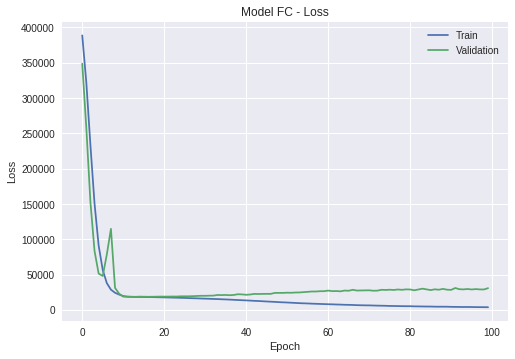

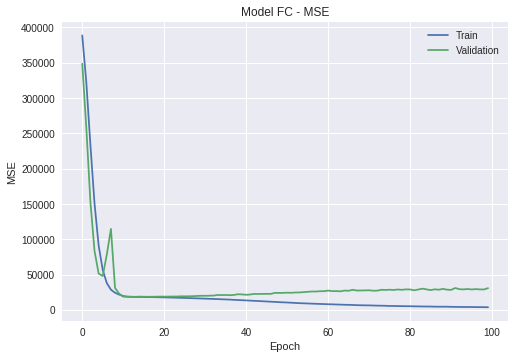

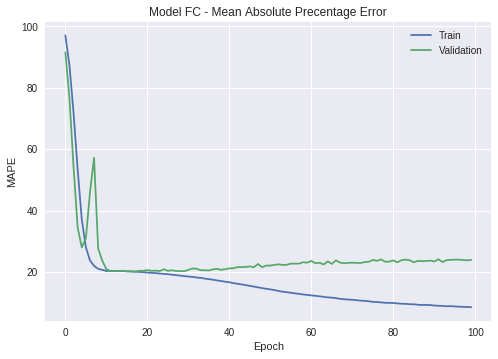

In [31]:
import matplotlib.pyplot as plt_fc

print(hist_fc.history.keys())

plt_fc.plot(hist_fc.history['loss'])
plt_fc.plot(hist_fc.history['val_loss'])
plt_fc.title('Model FC - Loss')
plt_fc.ylabel('Loss')
plt_fc.xlabel('Epoch')
plt_fc.legend(['Train', 'Validation'])
plt_fc.show()

plt_fc.plot(hist_fc.history['mean_squared_error'])
plt_fc.plot(hist_fc.history['val_mean_squared_error'])
plt_fc.title('Model FC - MSE')
plt_fc.ylabel('MSE')
plt_fc.xlabel('Epoch')
plt_fc.legend(['Train', 'Validation'])
plt_fc.show()

plt_fc.plot(hist_fc.history['mean_absolute_percentage_error'])
plt_fc.plot(hist_fc.history['val_mean_absolute_percentage_error'])
plt_fc.title('Model FC - Mean Absolute Precentage Error')
plt_fc.ylabel('MAPE')
plt_fc.xlabel('Epoch')
plt_fc.legend(['Train', 'Validation'])
plt_fc.show()

### Evaluate Model - Fully Connected

In [0]:
batch_size = 128
score_fc = model_fc.evaluate(dataFC_test_data, dataFC_test_target1, batch_size=batch_size)
print(model_fc.metrics_names)
print(score_fc)
print('Model FC Accuracy:', 100-round(score_fc[1], 2), '%.')



## Model - Convolution 1D

### Data Preprocess - Convolution 1D

In [0]:
import numpy as np_cnn1d

path = '/GoogleDrive/My Drive/project_0330342797_038628343/data/OurData/'
pathOutput = '/GoogleDrive/My Drive/project_0330342797_038628343/outputWeights/'
file='data_NN_1500_records_from038_to088_for_each_hundretch_of_each_bacteria_75000_Records.npy'
file1 ='data_NN_betaFamily_263379.npy'
file2 = 'data_NN_all_up_to_13_for_each_hundretch_of_each_bacteria_270274_Records.npy'
dataCNN1D = np_cnn1d.load(path+file)
print(dataCNN1D.shape)

In [0]:
# split data to train, valid, test --> with shuffling

from sklearn.model_selection import train_test_split

dataCNN1D_train, dataCNN1D_validate = train_test_split(dataCNN1D,train_size=0.7,test_size=0.3, random_state=42)
dataCNN1D_validate, dataCNN1D_test = train_test_split(dataCNN1D_validate,train_size=0.50,test_size=0.50, random_state=42)

# Train
dataCNN1D_train_data = dataCNN1D_train[:,0:200]
dataCNN1D_train_data = dataCNN1D_train_data.reshape(dataCNN1D_train_data.shape[0],200,1)
dataCNN1D_train_target = dataCNN1D_train[:,200]

dataCNN1D_train_target1 = dataCNN1D_train[:,200]*1000
dataCNN1D_train_target1 = dataCNN1D_train_target1.astype(np_cnn1d.int64)

print('train data shapes')
print(dataCNN1D_train_data.shape)
print(dataCNN1D_train_target1.shape)

# Validation
dataCNN1D_validate_data = dataCNN1D_validate [:,0:200]
dataCNN1D_validate_data = dataCNN1D_validate_data.reshape(dataCNN1D_validate_data.shape[0],200,1)
dataCNN1D_validate_target = dataCNN1D_validate[:,200]

dataCNN1D_validate_target1 = dataCNN1D_validate[:,200]*1000
dataCNN1D_validate_target1 = dataCNN1D_validate_target1.astype(np_cnn1d.int64)

print('validation data shapes')
print(dataCNN1D_validate_data.shape)
print(dataCNN1D_validate_target1.shape)

# Test
dataCNN1D_test_data = dataCNN1D_test[:,0:200]
dataCNN1D_test_data = dataCNN1D_test_data.reshape(dataCNN1D_test_data.shape[0],200,1)
dataCNN1D_test_target = dataCNN1D_test[:,200]

dataCNN1D_test_target1 = dataCNN1D_test[:,200]*1000
dataCNN1D_test_target1 = dataCNN1D_test_target1.astype(np_cnn1d.int64)

print('test data shapes')
print(dataCNN1D_test_data.shape)
print(dataCNN1D_test_target1.shape)

### Load Existing Model - Convolution 1D







In [0]:
# this block should be run only if we want to load a saved models and use it (instead or fitting the model again):
from keras.models import load_model

# Load best results
file_cnn1d_best1 ='Weights-048--109.99619.hdf5'
file_cnn1d_best = 'Weights-042--110.18304.hdf5'
model_cnn1d = load_model(pathOutput+'convolution1d/'+file_cnn1d_best)

# predict metrics using the test set
batch_size_cnn1d = 100

score_cnn1d = model_cnn1d.evaluate(dataCNN1D_test_data, dataCNN1D_test_target1, batch_size=batch_size_cnn1d)

mse_cnn1d = round(score_cnn1d[0], 2)
rmse_cnn1d = round(np_cnn1d.sqrt(mse_cnn1d),2)

print('Best Results')
print(model_cnn1d.metrics_names)
print(score_cnn1d)
print('Model CNN1D Test Set - Accuracy:', 100-round(score_cnn1d[1], 2), '%.')
print('Model CNN1D Test Set - MSE:', mse_cnn1d)
print('Model CNN1D Test Set - RMSE:', rmse_cnn1d)

### Build Model - Convolution 1D

In [0]:
from keras.models import Sequential
from keras import models, layers
import keras

# Instantiate an empty model
model_cnn1d = Sequential()
model_cnn1d.reset_states()

# Layer1 - Convolutional Layer 1 dimension
#keras.layers.Conv1D(filters, kernel_size, strides=1, padding='valid', data_format='channels_last', dilation_rate=1, 
#activation=None, use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros', kernel_regularizer=None, 
#bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None)

model_cnn1d.add(layers.Conv1D(filters=50, kernel_size=4, strides=4, activation='relu', input_shape=(200,1), padding='valid'))
#model_cnn1d.add(layers.Conv1D(filters=50, kernel_size=4, strides=1, activation='relu', input_shape=(200,1), padding='same'))

# Layer2 - Pooling Layer
model_cnn1d.add(layers.MaxPooling1D(pool_size=3, strides=3, padding='valid'))
#model_cnn1d.add(layers.MaxPooling1D(pool_size=8, strides=4, padding='same'))

# Layer3 - Convolutional Layer
model_cnn1d.add(layers.Conv1D(50, kernel_size=3, strides=1, activation='relu', padding='valid'))
#model_cnn1d.add(layers.Conv1D(50, kernel_size=2, strides=1, activation='relu', padding='valid'))

# Layer4 - Pooling Layer
model_cnn1d.add(layers.AveragePooling1D(pool_size=3, strides=3, padding='valid'))

# Layer5 - Fully Connected Convolutional Layer
model_cnn1d.add(layers.Conv1D(50, kernel_size=3, strides=1, activation='relu', padding='valid'))

# Flatten the CNN output so that we can connect it with fully connected layers
model_cnn1d.add(layers.Flatten())

# Layer6 -  Fully Connected Layer
model_cnn1d.add(layers.Dense(150, activation='relu'))

#model_cnn1d.add(layers.Dropout(0))

# Layer7 - Output Layer with linear activation and 1 output - for regression
model_cnn1d.add(layers.Dense(1, activation='linear'))

model_cnn1d.summary()


### Train Model - Convolution 1D

In [0]:
from keras.callbacks import ModelCheckpoint

checkpoint_cnn1d_name = pathOutput+'convolution1d/Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint_cnn1d = ModelCheckpoint(checkpoint_cnn1d_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
callbacks_cnn1d_list = [checkpoint_cnn1d]


# More Params
batch_size_cnn1d = 250
epoch_cnn1d = 100

# Compile the model
model_cnn1d.reset_states()
model_cnn1d.compile(loss='mse', optimizer='adam', metrics=['mape','mae', 'mse'])
#model_cnn1d.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mape','mse'])

# Train
hist_cnn1d = model_cnn1d.fit(dataCNN1D_train_data, dataCNN1D_train_target1, validation_data=(dataCNN1D_validate_data,dataCNN1D_validate_target1), batch_size=batch_size_cnn1d, epochs=epoch_cnn1d, callbacks=callbacks_cnn1d_list)

### Evaluate Model - Convolution 1D

In [0]:
# Evaluate
batch_size_cnn1d = 100
score_cnn1d = model_cnn1d.evaluate(dataCNN1D_test_data, dataCNN1D_test_target1, batch_size=batch_size_cnn1d)
print(model_cnn1d.metrics_names)
print (score_cnn1d)
print('Model CNN1D Accuracy:', 100-round(score_cnn1d[1], 2), '%.')

### Plot Model

In [0]:
import matplotlib.pyplot as plt_cnn1d

print(hist_cnn1d.history.keys())

plt_cnn1d.ylim(top=21000)
plt_cnn1d.ylim(bottom=18500)
plt_cnn1d.xlim(right=250)
plt_cnn1d.xlim(left=0)
plt_cnn1d.plot(hist_cnn1d.history['loss'])
plt_cnn1d.plot(hist_cnn1d.history['val_loss'])
plt_cnn1d.title('Model CNN1D - Loss')
plt_cnn1d.ylabel('Loss')
plt_cnn1d.xlabel('Epoch')
plt_cnn1d.legend(['Train', 'Validation'])
plt_cnn1d.show()

plt_cnn1d.plot(hist_cnn1d.history['mean_squared_error'])
plt_cnn1d.plot(hist_cnn1d.history['val_mean_squared_error'])
plt_cnn1d.title('Model CNN1D - MSE')
plt_cnn1d.ylabel('MSE')
plt_cnn1d.xlabel('Epoch')
plt_cnn1d.legend(['Train', 'Validation'])
plt_cnn1d.show()


plt_cnn1d.plot(hist_cnn1d.history['mean_absolute_percentage_error'])
plt_cnn1d.plot(hist_cnn1d.history['val_mean_absolute_percentage_error'])
plt_cnn1d.title('Model CNN1D - MAPE')
plt_cnn1d.ylabel('MAPE')
plt_cnn1d.xlabel('Epoch')
plt_cnn1d.legend(['Train', 'Validation'])
plt_cnn1d.show()

## Model - Convolution 2D

### Data Preprocess - Convolution 2D

In [0]:
import numpy as np_cnn2d

path = '/GoogleDrive/My Drive/project_0330342797_038628343/data/OurData/'
pathOutput = '/GoogleDrive/My Drive/project_0330342797_038628343/outputWeights/'
file='data_NN_1500_records_from038_to088_for_each_hundretch_of_each_bacteria_75000_Records.npy'
file1 ='data_NN_betaFamily_263379.npy'
file2 = 'data_NN_all_up_to_13_for_each_hundretch_of_each_bacteria_270274_Records.npy'


dataCNN2D = np_cnn2d.load(path+file)
print(dataCNN2D.shape)

In [0]:
# split data to train, valid, test --> with shuffling

from sklearn.model_selection import train_test_split

dataCNN2D_train, dataCNN2D_validate = train_test_split(dataCNN2D,train_size=0.7,test_size=0.3, random_state=42)
dataCNN2D_validate, dataCNN2D_test = train_test_split(dataCNN2D_validate,train_size=0.50,test_size=0.50, random_state=42)

# train data
dataCNN2D_train_data = dataCNN2D_train[:,0:200]
dataCNN2D_train_data = dataCNN2D_train_data.reshape(dataCNN2D_train_data.shape[0],4,50,1)
dataCNN2D_train_target = dataCNN2D_train[:,200]

dataCNN2D_train_target1 = dataCNN2D_train[:,200]*1000
dataCNN2D_train_target1 = dataCNN2D_train_target1.astype(np_cnn2d.int64)

print('train data shapes')
print(dataCNN2D_train_data.shape)
print(dataCNN2D_train_target1.shape)

# validation data
dataCNN2D_validate_data = dataCNN2D_validate [:,0:200]
dataCNN2D_validate_data = dataCNN2D_validate_data.reshape(dataCNN2D_validate_data.shape[0],4,50,1)
dataCNN2D_validate_target = dataCNN2D_validate[:,200]

dataCNN2D_validate_target1 = dataCNN2D_validate[:,200]*1000
dataCNN2D_validate_target1 = dataCNN2D_validate_target1.astype(np_cnn2d.int64)

print('validation data shapes')
print(dataCNN2D_validate_data.shape)
print(dataCNN2D_validate_target1.shape)


# test data
dataCNN2D_test_data = dataCNN2D_test[:,0:200]
dataCNN2D_test_data = dataCNN2D_test_data.reshape(dataCNN2D_test_data.shape[0],4,50,1)
dataCNN2D_test_target = dataCNN2D_test[:,200]

dataCNN2D_test_target1 = dataCNN2D_test[:,200]*1000
dataCNN2D_test_target1 = dataCNN2D_test_target1.astype(np_cnn2d.int64)

print('test data shapes')
print(dataCNN2D_test_data.shape)
print(dataCNN2D_test_target1.shape)

### Load Existing Model - Convolution 2D

In [0]:
# this block should be run only if we want to load a saved models and use it (instead or fitting the model again):
from keras.models import load_model

# Load best results
file_cnn2d_best1 ='Weights-006--117.57759.hdf5'
file_cnn2d_best = 'Weights-016--108.77296.hdf5'
model_cnn2d = load_model(pathOutput+'convolution2d/'+file_cnn2d_best)

# now we can use the model our model for example:

batch_size_cnn2d = 100

score_cnn2d = model_cnn2d.evaluate(dataCNN2D_test_data, dataCNN2D_test_target1, batch_size=batch_size_cnn2d)
print('Best Results')
print(model_cnn2d.metrics_names)
print(score_cnn2d)
print('Model CNN2D Accuracy:', 100-round(score_cnn2d[1], 2), '%.')

### Build Model - Convolution 2D

In [0]:
from keras.models import Sequential
from keras import models, layers
import keras

# Instantiate an empty model
model_cnn2d = Sequential()
model_cnn2d.reset_states()


# Instantiate an empty model
model_cnn2d = Sequential()

# Layer1 - Convolutional Layer
model_cnn2d.add(layers.Conv2D(50, kernel_size=(4, 1), strides=(1, 1), activation='relu', input_shape=(4, 50, 1), padding='same'))
model_cnn2d.add(layers.BatchNormalization())


# Layer2 - Pooling Layer
model_cnn2d.add(layers.MaxPooling2D(pool_size=(4,3), strides=(1, 1), padding='same'))

# Layer3 - Convolutional Layer
model_cnn2d.add(layers.Conv2D(50, kernel_size=(4, 3), strides=(1, 1), activation='relu', padding='same'))
model_cnn2d.add(layers.BatchNormalization())

# Layer4 - Pooling Layer
model_cnn2d.add(layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))

# Layer5 - Fully Connected Convolutional Layer
model_cnn2d.add(layers.Conv2D(120, kernel_size=(1, 3), strides=(1, 1), activation='relu', padding='same'))
model_cnn2d.add(layers.BatchNormalization())

# Flatten the CNN output so that we can connect it with fully connected layers
model_cnn2d.add(layers.Flatten())

# Layer6 -  Fully Connected Layer
model_cnn2d.add(layers.Dense(150, activation='relu'))

model_cnn2d.add(layers.Dropout(0.5))

# Layer7 - Output Layer with linear activation and 1 output - for regression net
model_cnn2d.add(layers.Dense(1, activation='relu'))

model_cnn2d.summary()


### Visualize Model - Convolution 2D

In [0]:
from keras.utils import plot_model

plot_model(model_cnn2d, to_file=pathOutput+'convolution2d/'+'model_cnn2d.png', show_shapes = True, show_layer_names = True)
#check why dpi=200 is not supported

### Train Model - Convolution 2D

In [0]:
from keras.callbacks import ModelCheckpoint

checkpoint_cnn2d_name = pathOutput+'convolution2d/Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint_cnn2d = ModelCheckpoint(checkpoint_cnn2d_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
callbacks_cnn2d_list = [checkpoint_cnn2d]


# More Params
batch_size_cnn2d = 250
epoch_cnn2d = 50
#optimizer_cnn2d = optimizers.Adam(lr=0.001, decay=0.000, amsgrad=False)
#optimizer_cnn2d = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)

# Compile the model
model_cnn2d.reset_states()
model_cnn2d.compile(loss='mse', optimizer= 'adam', metrics=['mape','mse','mae'])

# Train
hist_cnn2d = model_cnn2d.fit(dataCNN2D_train_data, dataCNN2D_train_target1, validation_data=(dataCNN2D_validate_data,dataCNN2D_validate_target1), batch_size=batch_size_cnn2d, epochs=epoch_cnn2d, callbacks=callbacks_cnn2d_list)

### Evaluate - Model - Convolution 2D

In [0]:
# Evaluate

batch_size_cnn2d = 100

score_cnn2d = model_cnn2d.evaluate(dataCNN2D_test_data, dataCNN2D_test_target1, batch_size=batch_size_cnn2d)

print(model_cnn2d.metrics_names)
print(score_cnn2d)
print('Model CNN2D Accuracy:', 100-round(score_cnn2d[1], 2), '%.')

### Plot Model





In [0]:
import matplotlib.pyplot as plt_cnn2d

print(hist_cnn2d.history.keys())

plt_cnn2d.ylim(top=30000)
plt_cnn2d.ylim(bottom=16000)
plt_cnn2d.xlim(right=50)
plt_cnn2d.xlim(left=0)
plt_cnn2d.plot(hist_cnn2d.history['loss'])
plt_cnn2d.plot(hist_cnn2d.history['val_loss'])
plt_cnn2d.title('Model CNN2D - Loss')
plt_cnn2d.ylabel('Loss')
plt_cnn2d.xlabel('Epoch')
plt_cnn2d.legend(['Train', 'Validation'])
plt_cnn2d.show()

plt_cnn2d.plot(hist_cnn2d.history['mean_squared_error'])
plt_cnn2d.plot(hist_cnn2d.history['val_mean_squared_error'])
plt_cnn2d.title('Model CNN2D - MSE')
plt_cnn2d.ylabel('MSE')
plt_cnn2d.xlabel('Epoch')
plt_cnn2d.legend(['Train', 'Validation'])
plt_cnn2d.show()


plt_cnn2d.plot(hist_cnn2d.history['mean_absolute_percentage_error'])
plt_cnn2d.plot(hist_cnn2d.history['val_mean_absolute_percentage_error'])
plt_cnn2d.title('Model CNN2D - MAPE')
plt_cnn2d.ylabel('MAPE')
plt_cnn2d.xlabel('Epoch')
plt_cnn2d.legend(['Train', 'Validation'])
plt_cnn2d.show()

### > Save Model

In [0]:
# if we want to save the model for later use we whould run this code block:
model_1.save("/GoogleDrive/My Drive/ex1_0330342797_038628343/model_1.h5")

## Model - Random Forest Regression

### Data Preprocess - Random Forest

In [3]:
import numpy as np_rf

path = '/GoogleDrive/My Drive/project_0330342797_038628343/data/OurData/'
pathOutput = '/GoogleDrive/My Drive/project_0330342797_038628343/randomForest/'
file='data_random_forest_1500_records_from037_to087_for_each_hundretch_of_each_bacteria_75000_Records.npy'
file1 ='data_random_forest_betaFamily_263379.npy'
dataRF = np_rf.load(path+file)

print(dataRF.shape)

(75000, 51)


In [4]:
# split data to train, test --> with shuffling

from sklearn.model_selection import train_test_split

dataRF_train, dataRF_test = train_test_split(dataRF,train_size=0.7,test_size=0.3)

# train data + target
dataRF_train_data = dataRF_train[:,0:50]
dataRF_train_target = dataRF_train[:,50]
print('dataRF_train_data.shape',dataRF_train_data.shape[1])
print('dataRF_train_data',dataRF_train_data[1])

dataRF_train_target1 = dataRF_train[:,50]*1000
dataRF_train_target1 = dataRF_train_target1.astype(np_rf.int64)
print('dataRF_train_target1',dataRF_train_target1[1:10])

# test data + target
dataRF_test_data = dataRF_test[:,0:50]
dataRF_test_target = dataRF_test[:,50]
print('dataRF_test_data.shape',dataRF_test_data.shape[1])
print('dataRF_test_data',dataRF_test_data[1])

dataRF_test_target1 = dataRF_test[:,50]*1000
dataRF_test_target1 = dataRF_test_target1.astype(np_rf.int64)
print('dataRF_test_target1',dataRF_test_target1[1:10])

# our feature list in this case is the position of the nucleotide 1-50
featuresRF=np_rf.arange(1,51)

dataRF_train_data.shape 50
dataRF_train_data [2. 1. 2. 3. 1. 2. 4. 4. 1. 1. 4. 4. 3. 2. 2. 2. 3. 4. 2. 4. 2. 1. 4. 2.
 3. 1. 3. 2. 3. 3. 3. 2. 2. 3. 1. 4. 4. 4. 3. 3. 1. 1. 4. 4. 4. 3. 1. 1.
 3. 4.]
dataRF_train_target1 [429 765 738 456 521 573 620 583 726]
dataRF_test_data.shape 50
dataRF_test_data [4. 2. 1. 1. 4. 4. 4. 2. 3. 3. 1. 1. 3. 1. 1. 4. 3. 4. 1. 4. 4. 2. 2. 3.
 3. 2. 1. 4. 2. 4. 3. 1. 3. 1. 4. 1. 3. 1. 1. 1. 2. 1. 3. 3. 1. 1. 4. 4.
 2. 2.]
dataRF_test_target1 [506 770 778 554 555 398 712 855 412]


### Model Train - Random Forest

In [7]:
from sklearn.ensemble import RandomForestRegressor

#setting random seed
np_rf.random.seed(0)

rfrg = RandomForestRegressor(n_estimators = 500, max_depth = 5, criterion = 'mse', random_state = 42)
rfrg.fit(dataRF_train_data, dataRF_train_target1)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

### Determine Performance Metrics 

In [8]:
# Use the forest's predict method on the test data
predictions_rf = rfrg.predict(dataRF_test_data)

# Calculate the absolute errors
errors_rf = abs(predictions_rf - dataRF_test_target1)

errors_sqrd_rf = errors_rf*errors_rf

# Print out the mean squared error (mse)
print('Baseline Mean Squared Error:', round(np_rf.mean(errors_sqrd_rf), 2))

# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np_rf.mean(errors_rf), 2))

# Calculate mean absolute percentage error (MAPE)
mape_rf = 100 * (errors_rf / dataRF_test_target1)

# Calculate and display accuracy
accuracy_rf = 100 - np_rf.mean(mape_rf)

print('Accuracy:', round(accuracy_rf, 2), '%.')


Baseline Mean Squared Error: 20098.02
Mean Absolute Error: 122.75
Accuracy: 78.58 %.


### Visualitazion - Tree

In [0]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot

# Pull out one tree from the forest
tree = rfrg.estimators_[0]

# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names=featuresRF, rounded = True, precision = 1)

# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')

# Write graph to a png file
graph.write_png(pathOutput+'tree.png')

### Visualization - Importances

In [0]:
importances = list(rfrg.feature_importances_)
print(importances)

import matplotlib.pyplot as plt
%matplotlib inline

# Set the style
plt.style.use('fivethirtyeight')

# list of x locations for plotting
x_values = list(range(len(importances)))

# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')

# Tick labels for x axis
plt.xticks(x_values, featuresRF, rotation='vertical')

# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

# Lenet 5 - Dropout layer



### > Load Exsisting Model



In [0]:
# this block should be run only if we want to load a saved models and use it (instead or fitting the model again):
from keras.models import Sequential
from keras import models, layers
import keras
from keras.models import load_model

model_2 = load_model('/GoogleDrive/My Drive/ex1_0330342797_038628343/model_2.h5')

# now we can use the model our model for example:
batch_size = 128
score_2 = model_2.evaluate(x_test, y_test, batch_size=batch_size)


print (score_2)

### >Train Model


In [0]:
from keras.models import Sequential
from keras import models, layers
from keras.layers import Dropout
import keras

# More Params
batch_size = 128
epoch = 10

# Instantiate an empty model
model_2 = Sequential()

# Layer1 - Convolutional Layer
model_2.add(layers.Conv2D(6, kernel_size=(5, 5), strides=(1, 1), activation='relu', input_shape=(28,28,1), padding='same'))

# Layer2 - Pooling Layer
model_2.add(layers.AveragePooling2D(pool_size=(2, 2), strides=(1, 1), padding='valid'))

# Layer3 - Convolutional Layer
model_2.add(layers.Conv2D(16, kernel_size=(5, 5), strides=(1, 1), activation='relu', padding='valid'))

# Layer4 - Pooling Layer
model_2.add(layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))

# Layer5 - Fully Connected Convolutional Layer
model_2.add(layers.Conv2D(120, kernel_size=(5, 5), strides=(1, 1), activation='relu', padding='valid'))

# Flatten the CNN output so that we can connect it with fully connected layers
model_2.add(layers.Flatten())

# Layer6 -  Fully Connected Layer
model_2.add(layers.Dense(84, activation='relu'))

#################################################
########   addding the dropout:  ################

model_2.add(Dropout(0.1))

# Remark: We read that keras disable the dropout for validation data so no need to disable this layer property
#################################################

# Layer7 - Output Layer with softmax activation
model_2.add(layers.Dense(10, activation='softmax'))

# Compile the model
model_2.compile(loss=keras.losses.categorical_crossentropy, optimizer='adam', metrics=['accuracy'])

# Train
hist_2 = model_2.fit(x_train, y_train, validation_data=(x_test,y_test), batch_size=batch_size, epochs=epoch)

# Evaluate
# score_2 = model_2.evaluate(x_test, y_test, batch_size=batch_size)


### > Plot Model


In [0]:
import matplotlib.pyplot as plt_2

plt_2.plot(hist_2.history['acc'])
plt_2.plot(hist_2.history['val_acc'])
plt_2.title('Model accuracy')
plt_2.ylabel('accuracy')
plt_2.xlabel('epoch')
#plt_2.legend(['Train, Validation'], loc=0)
plt_2.legend(['Train', 'Test'])
plt_2.show()

### > Save Model

In [0]:
# if we want to save the model for later use we whould run this code block:
model_2.save("/GoogleDrive/My Drive/ex1_0330342797_038628343/model_2.h5")

# Lenet 5 - Weight Decay



### > Load Exsisting Model



In [0]:
# this block should be run only if we want to load a saved models and use it (instead or fitting the model again):
from keras.models import Sequential
from keras import models, layers
import keras
from keras.models import load_model

model_3 = load_model('/GoogleDrive/My Drive/ex1_0330342797_038628343/model_3.h5')

# now we can use the model our model for example:
batch_size = 128
score_3 = model_3.evaluate(x_test, y_test, batch_size=batch_size)


print (score_3)

### > Train Model


In [0]:
from keras.models import Sequential
from keras import models, layers
import keras
from keras import regularizers

# More Params
batch_size = 128
epoch = 10

# Instantiate an empty model
model_3 = Sequential()

# Layer1 - Convolutional Layer
model_3.add(layers.Conv2D(6, kernel_size=(5, 5), strides=(1, 1), activation='relu', input_shape=(28,28,1), padding='same'))

# Layer2 - Pooling Layer
model_3.add(layers.AveragePooling2D(pool_size=(2, 2), strides=(1, 1), padding='valid'))

# Layer3 - Convolutional Layer
model_3.add(layers.Conv2D(16, kernel_size=(5, 5), strides=(1, 1), activation='relu', padding='valid'))

# Layer4 - Pooling Layer
model_3.add(layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))

# Layer5 - Fully Connected Convolutional Layer
model_3.add(layers.Conv2D(120, kernel_size=(5, 5), strides=(1, 1), activation='relu', padding='valid'))

# Flatten the CNN output so that we can connect it with fully connected layers
model_3.add(layers.Flatten())

# Layer6 -  Fully Connected Layer
model_3.add(layers.Dense(84, activation='relu', kernel_regularizer=regularizers.l2(0.01)))

# Layer7 - Output Layer with softmax activation
model_3.add(layers.Dense(10, activation='softmax'))

#####
# adam1 = keras.optimizers.Adam(lr=0.0011, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.001, amsgrad=False)
# model_3.compile(loss=keras.losses.categorical_crossentropy, optimizer=adam1, metrics=['accuracy'])
#####

# Compile the model
model_3.compile(loss=keras.losses.categorical_crossentropy, optimizer='adam', metrics=['accuracy'])

# Train
hist_3 = model_3.fit(x_train, y_train, validation_data=(x_test,y_test), batch_size=batch_size, epochs=epoch)

# Evaluate
# score_3 = model_3.evaluate(x_test, y_test, batch_size=batch_size)

### > Plot Model


In [0]:
import matplotlib.pyplot as plt_3

plt_3.plot(hist_3.history['acc'])
plt_3.plot(hist_3.history['val_acc'])
plt_3.title('Model accuracy')
plt_3.ylabel('accuracy')
plt_3.xlabel('epoch')
#plt_3.legend(['Train, Validation'], loc=0)
plt_3.legend(['Train', 'Test'])
plt_3.show()

### > Save Model


In [0]:
# if we want to save the model for later use we whould run this code block:
model_3.save("/GoogleDrive/My Drive/ex1_0330342797_038628343/model_3.h5")

# Lenet 5 - Batch Normalization

### > Load Exsisting Model


In [0]:
# this block should be run only if we want to load a saved models and use it (instead or fitting the model again):
from keras.models import Sequential
from keras import models, layers
import keras
from keras.models import load_model

model_4 = load_model('/GoogleDrive/My Drive/ex1_0330342797_038628343/model_4.h5')

# now we can use the model our model for example:
batch_size = 128
score_4 = model_4.evaluate(x_test, y_test, batch_size=batch_size)


print (score_4)

### > Train Model


In [0]:
from keras.models import Sequential
from keras import models, layers
import keras

# More Params
batch_size = 128
epoch = 10

# Instantiate an empty model
model_4 = Sequential()

# Layer1 - Convolutional Layer
model_4.add(layers.Conv2D(6, kernel_size=(5, 5), strides=(1, 1), activation='relu', input_shape=(28,28,1), padding='same'))

# Layer2 - Pooling Layer
model_4.add(layers.AveragePooling2D(pool_size=(2, 2), strides=(1, 1), padding='valid'))

## ADD BATCH NORM LAYER ##
 #model_4.add(layers.BatchNormalization(axis=-1, momentum=0.6))
model_4.add(layers.BatchNormalization())
##

# Layer3 - Convolutional Layer
model_4.add(layers.Conv2D(16, kernel_size=(5, 5), strides=(1, 1), activation='relu', padding='valid'))

# Layer4 - Pooling Layer
model_4.add(layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))

# Layer5 - Fully Connected Convolutional Layer
model_4.add(layers.Conv2D(120, kernel_size=(5, 5), strides=(1, 1), activation='relu', padding='valid'))

# Flatten the CNN output so that we can connect it with fully connected layers
model_4.add(layers.Flatten())

# Layer6 -  Fully Connected Layer
model_4.add(layers.Dense(84, activation='relu'))

# Layer7 - Output Layer with softmax activation
model_4.add(layers.Dense(10, activation='softmax'))

# Compile the model
model_4.compile(loss=keras.losses.categorical_crossentropy, optimizer='adam', metrics=['accuracy'])

# Train
hist_4 = model_4.fit(x_train, y_train, batch_size=batch_size, epochs=epoch, validation_data=(x_test,y_test))

# Evaluate
#score_4 = model_4.evaluate(x_test, y_test, batch_size=batch_size)


### > Plot Model


In [0]:
import matplotlib.pyplot as plt_4

plt_4.plot(hist_4.history['acc'])
plt_4.plot(hist_4.history['val_acc'])
plt_4.title('Model accuracy')
plt_4.ylabel('accuracy')
plt_4.xlabel('epoch')
plt_4.legend(['Train', 'Test'])
plt_4.show()

### > Save Model

In [0]:
# if we want to save the model for later use we whould run this code block:
model_4.save("/GoogleDrive/My Drive/ex1_0330342797_038628343/model_4.h5")